## Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge


> ## Data Set

In [3]:
df_cancer = pd.read_csv('cancer_data.csv')
df_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


- diagnosis (M = malignant, B = benign)
- texture (standard deviation of gray-scale values)
- concave points (number of concave portions of the contour)

In [4]:
df_cancer[['texture_mean','concave points_mean']].describe()

,texture_mean,concave points_mean
count,569.000000,569.000000
mean,19.289649,0.048919
std,4.301036,0.038803
min,9.710000,0.000000
25%,16.170000,0.020310
50%,18.840000,0.033500
75%,21.800000,0.074000
max,39.280000,0.201200


In [5]:
# Cek missing value
df_cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df_cancer.drop(columns =['Unnamed: 32'],axis = 1, inplace = True)

In [7]:
df_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


> ## Data Splitting

In [8]:
# Data Splitting

x = df_cancer[['texture_mean','concave points_mean']]
# y = df_cancer['diagnosis']
y = np.where(df_cancer['diagnosis']=='M',1,0)

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    stratify = y,
    test_size = 0.2,
    random_state = 2020
)

> ## LogReg Modeling

In [9]:
logreg = LogisticRegression(C=100, solver = 'liblinear')
logreg.fit(x_train, y_train)

LogisticRegression(C=100, solver='liblinear')

In [10]:
y_pred_logreg = logreg.predict(x_test)
print('The accuracy score for logistic Regression:', accuracy_score(y_test,y_pred_logreg)*100, '%')

The accuracy score for logistic Regression: 91.22807017543859 %


In [11]:
print('Bo: ', logreg.intercept_)
print('B1 and B2: ', logreg.coef_)

Bo:  [-8.35059757]
B1 and B2:  [[ 0.22212974 69.11584855]]


> ## Decision Tree Modeling

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

tree = DecisionTreeClassifier(max_depth= 2, criterion = 'entropy')
tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [26]:
y_pred_tree = tree.predict(x_test)
print('The accuracy score for Decision Tree is: ', accuracy_score(y_test,y_pred_tree)*100, '%')

The accuracy score for Decision Tree is:  85.08771929824562 %


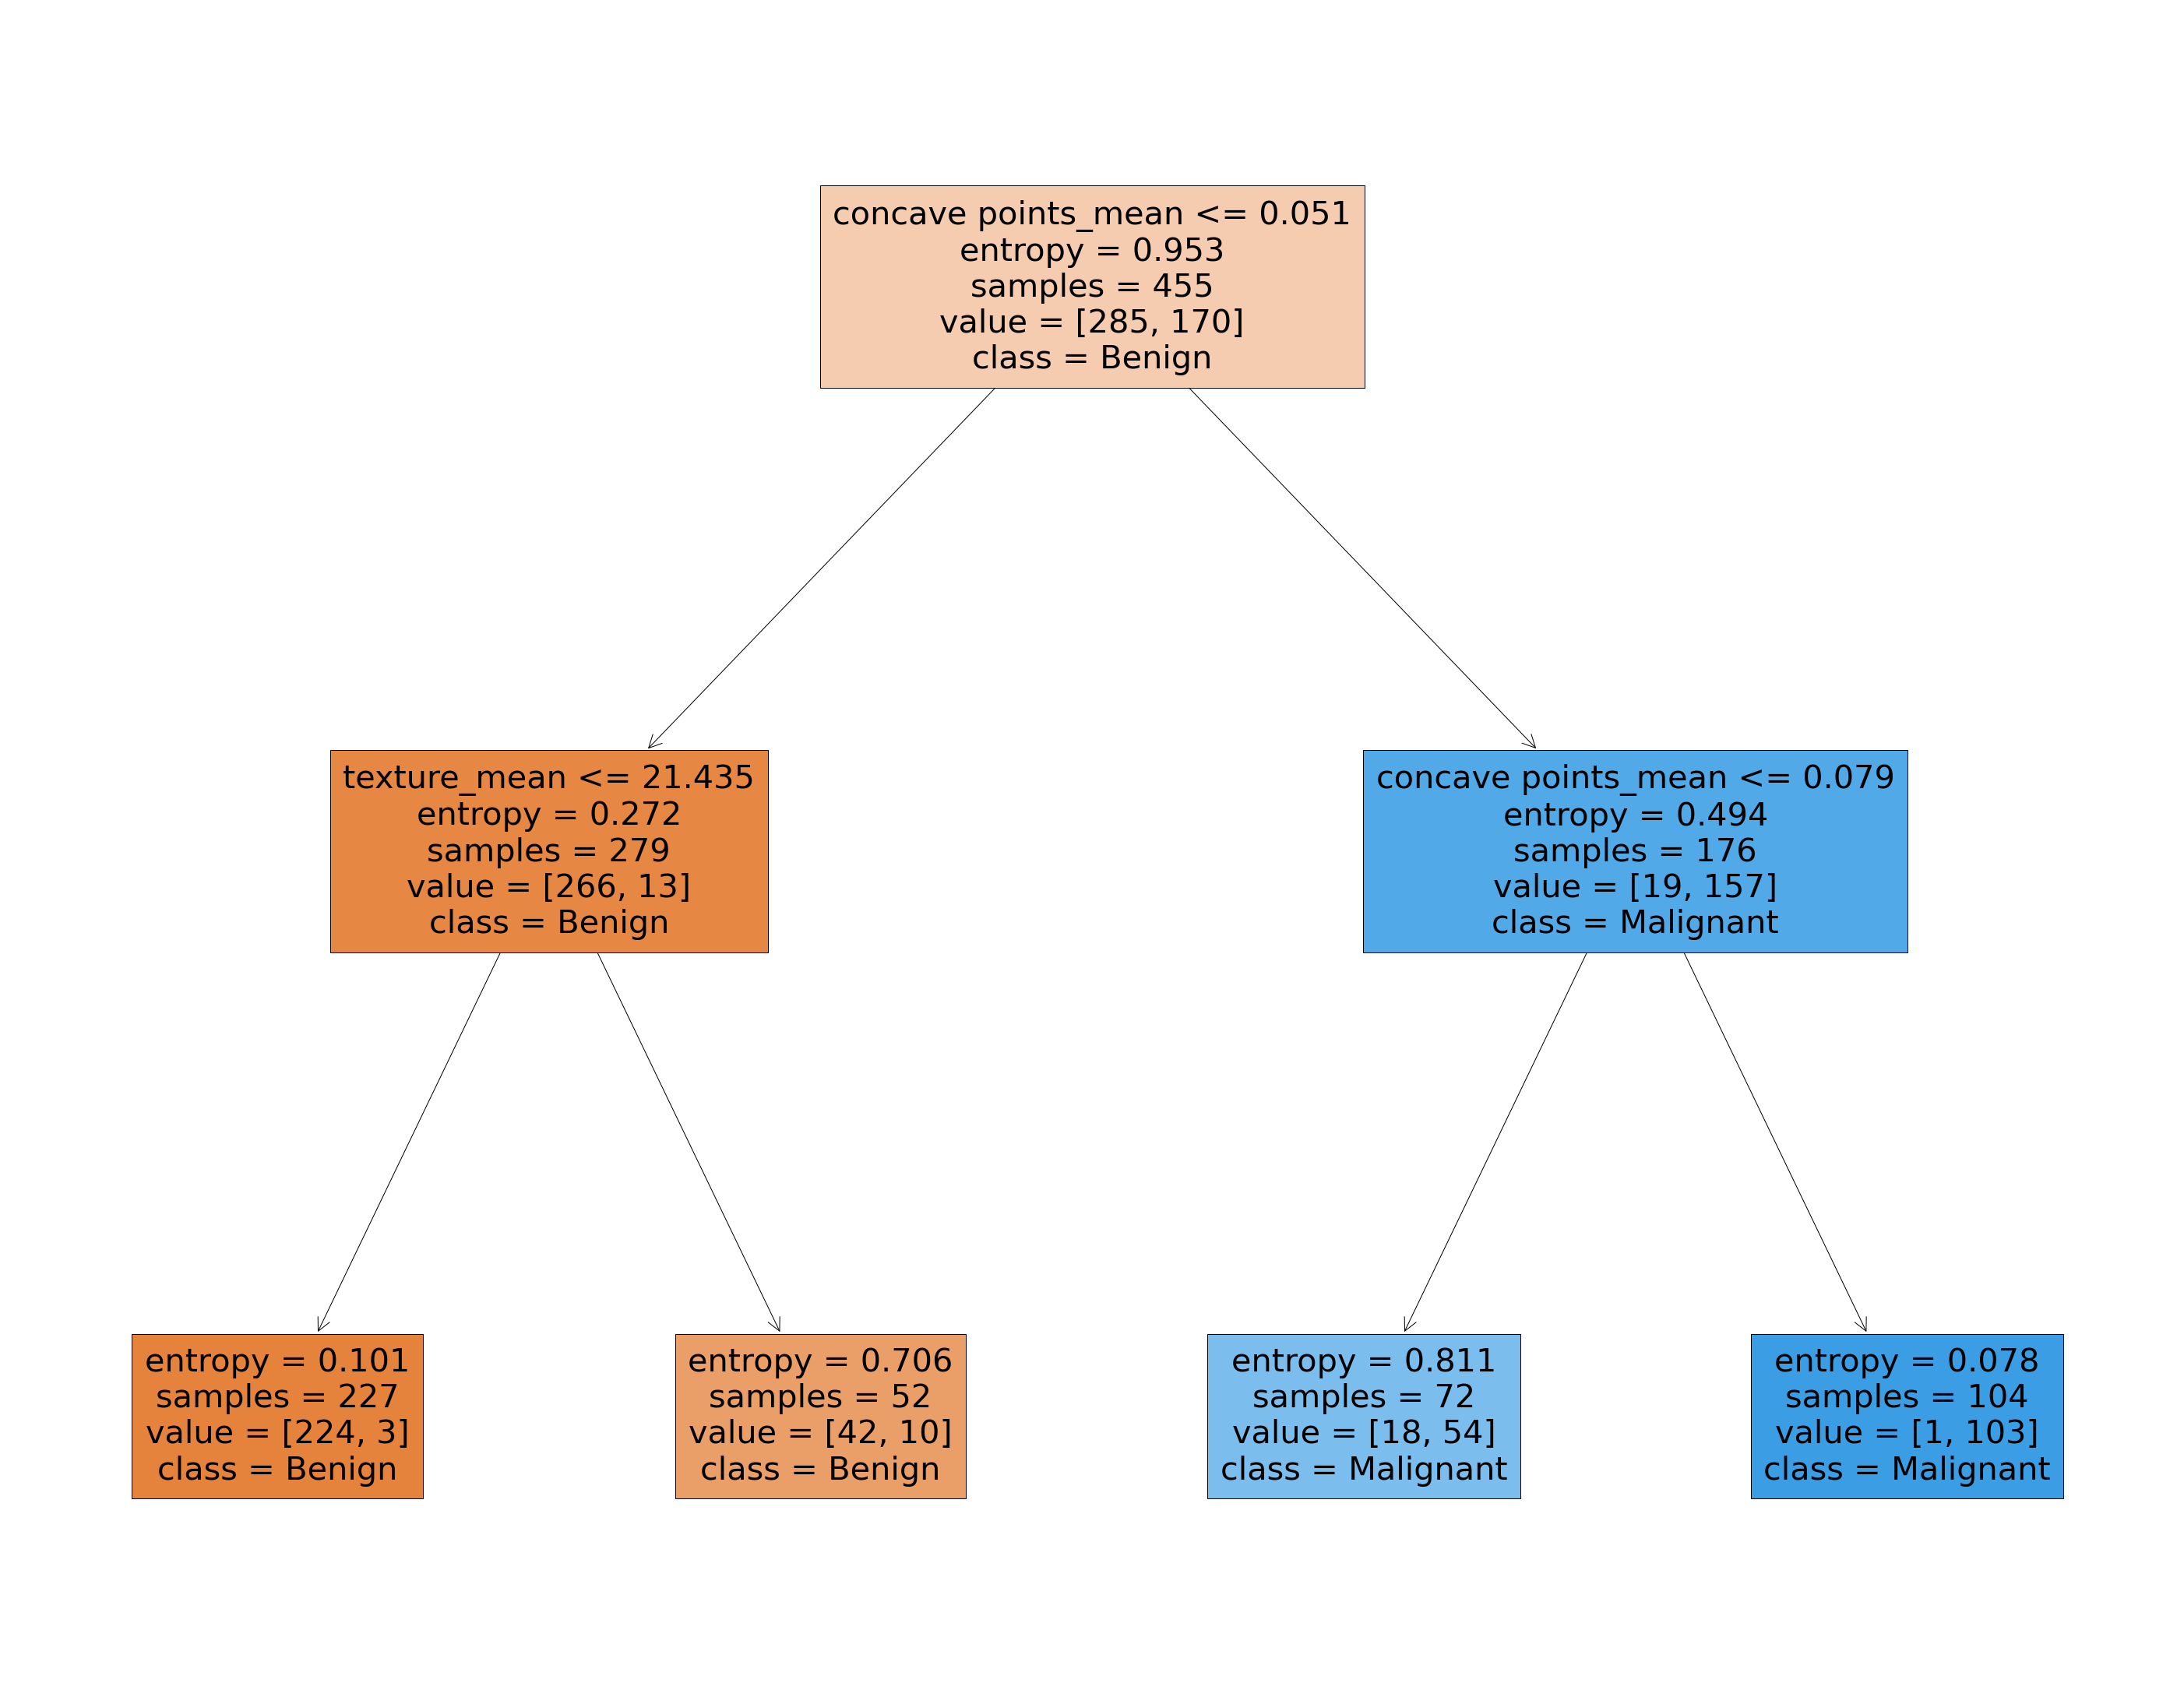

In [14]:
plt.figure(figsize=(50,40))
plot_tree(tree, filled = True, feature_names= list(x), class_names=['Benign','Malignant'])
plt.show()

> ## Mencari Max Depth

In [15]:
depths = range(1,25)
testing_accuracies = []
training_accuracies = []
score = 0

for i in depths:
    tree = DecisionTreeClassifier(
        criterion = 'entropy',
        max_depth = i)
    tree.fit(x_train, y_train)

    y_predict_train = tree.predict(x_train)
    training_accuracies.append(accuracy_score(y_train,y_predict_train))

    y_predict_test = tree.predict(x_test)
    acc_score = accuracy_score(y_test,y_predict_test)
    testing_accuracies.append(acc_score)

    if score < acc_score:
        best_depth = i
        score = acc_score

In [16]:
print('Best maximum depth:', best_depth)
print('Accuracy for best max depth:', score)

Best maximum depth: 3
Accuracy for best max depth: 0.9122807017543859


C:\Users\dreamscape\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dreamscape\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dreamscape\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

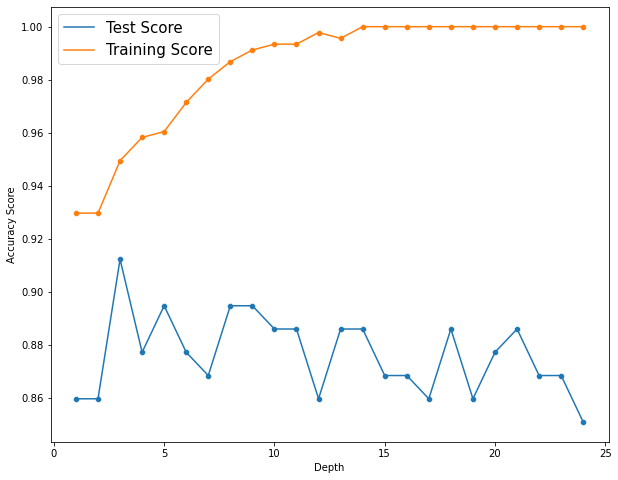

In [17]:
plt.figure(figsize = (10,8))
plt.xlabel('Depth')
plt.ylabel('Accuracy Score')

sns.lineplot(depths, testing_accuracies)
sns.scatterplot(depths, testing_accuracies)

sns.lineplot(depths, training_accuracies)
sns.scatterplot(depths, training_accuracies)
plt.legend(['Test Score', 'Training Score'], fontsize = 15)
plt.show()

> ## KNN with Scalling

<AxesSubplot:xlabel='texture_mean', ylabel='concave points_mean'>

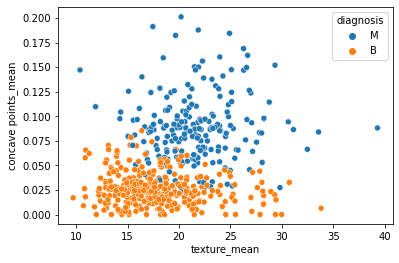

In [18]:
sns.scatterplot(x = 'texture_mean', y = 'concave points_mean', hue = 'diagnosis', data = df_cancer)

In [19]:
x_train

,texture_mean,concave points_mean
542,25.42,0.030270
367,18.02,0.020270
536,22.55,0.061390
213,25.56,0.065970
347,14.74,0.035280
...,...,...
327,17.93,0.005592
164,22.04,0.097020
405,18.59,0.029320
68,17.33,0.043750


In [20]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [21]:
# KNN Model

from sklearn.neighbors import KNeighborsClassifier
knn_scaled = KNeighborsClassifier(n_neighbors= 5)
knn_scaled.fit(x_train_scaled, y_train)

y_pred_scaled = knn_scaled.predict(x_test_scaled)
print('The aacuracy score for KNN scaled is: ', accuracy_score(y_test,y_pred_scaled)*100, '%')

The aacuracy score for KNN scaled is:  91.22807017543859 %


> ## KNN Without Scaling

In [22]:
# KNN Model

knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(x_train,y_train)

y_pred_knn = knn.predict(x_test)
print('The aacuracy score for KNN without scaled is: ', accuracy_score(y_test,y_pred_knn)*100, '%')

The aacuracy score for KNN without scaled is:  70.17543859649122 %


> ## Choosing Best K Factor

In [23]:
k = range(1,30,2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(x_train_scaled,y_train)

    y_predict_train = knn.predict(x_train_scaled)
    training_accuracies.append(accuracy_score(y_train,y_predict_train))

    y_predict_test = knn.predict(x_test_scaled)
    acc_score = accuracy_score(y_test,y_predict_test)
    testing_accuracies.append(acc_score)

    if score < acc_score:
        score = acc_score
        best_k = i

In [24]:
print('The obtimal K Value:', best_k)
print('The accuracy value: ',score)

The obtimal K Value: 5
The accuracy value:  0.9122807017543859


C:\Users\dreamscape\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dreamscape\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\dreamscape\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

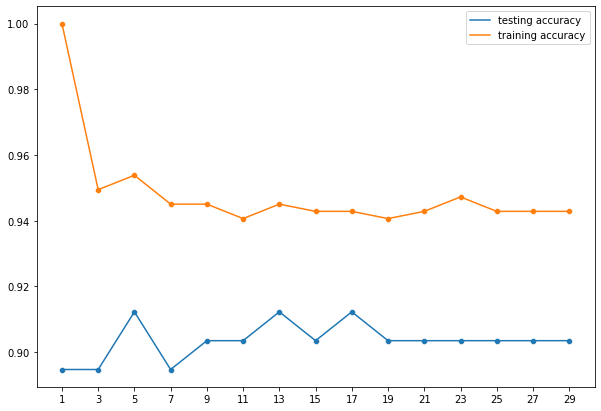

In [25]:
# Plot 

plt.figure(figsize = (10,7))
sns.lineplot(k,testing_accuracies)
sns.scatterplot(k,testing_accuracies)
sns.lineplot(k,training_accuracies)
sns.scatterplot(k,training_accuracies)
plt.legend(['testing accuracy','training accuracy'])
plt.xticks(list(k))
plt.show()

### Conclusion
<br>
Here is the comparison between accuracy value for each model:
<br>
- Logistic Regression: 91.22%
- Decision Tree: 91.22%
<br>
with Max Depth:  3
<br>
- KNN Scaled: 91.22%
- KNN Without Scaled: 70.17%
<br>
with the best K value: 5